In [ ]:
%cd 'drive/MyDrive/cARscan'
%ls

/content/drive/MyDrive/cARscan
bad_light/  car_model.h5  images/


In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
# good = f'images/view{i}./images/view{i}.jpeg'
# bad = f'bad_light/car{i}.jpeg'
good_img_paths = [f'images/view{i}./images/view{i}.jpeg' for i in range(1,11)]
bad_img_paths = [f'bad_light/car{i}.jpeg' for i in range(1,6)]

In [ ]:
X = np.zeros((len(good_img_paths)+len(bad_img_paths), 256), dtype=np.float64)
y = np.zeros((len(good_img_paths)+len(bad_img_paths)), dtype=np.uint8)

In [ ]:
X.shape, y.shape

((15, 256), (15,))

In [ ]:
for i, p in enumerate(good_img_paths):
  image = imread(p)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  histr = cv2.calcHist([gray, gray],[0],None,[256],[0,256])
  X[i] = histr[:,0]/np.max(histr)
  y[i] = 0

for i, p in enumerate(bad_img_paths):
  image = imread(p)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  histr = cv2.calcHist([gray, gray],[0],None,[256],[0,256])
  X[i+len(good_img_paths)] = histr[:,0]/np.max(histr)
  y[i+len(good_img_paths)] = 1


In [ ]:
# histr[:,0]/np.max(histr)

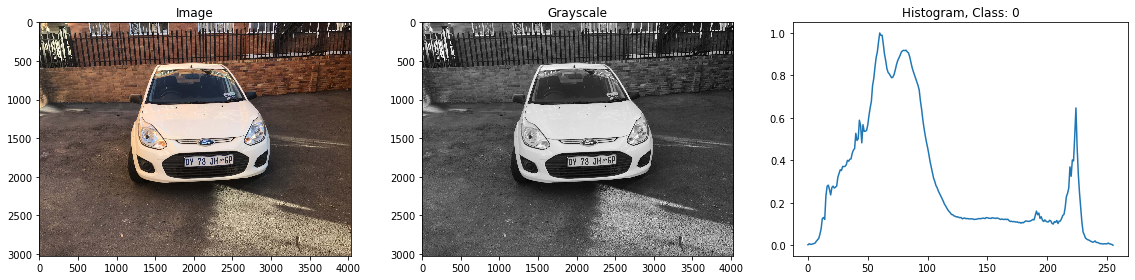

In [ ]:
i = 2
image = imread(f'images/view{i}./images/view{i}.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=[16,4])
plt.subplot(131)
imshow(image)
plt.title('Image')
plt.subplot(132)
imshow(gray)
plt.title('Grayscale')
plt.subplot(133)
plt.plot(X[i-1])
plt.title('Histogram, Class: '+str(y[i-1]))
plt.show()


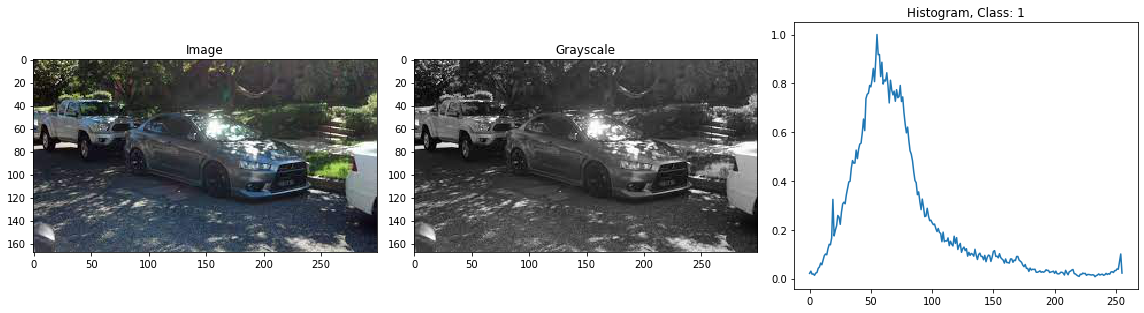

In [ ]:
i = 5
image = imread(f'bad_light/car{i}.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=[16,4])
plt.subplot(131)
imshow(image)
plt.title('Image')
plt.subplot(132)
imshow(gray)
plt.title('Grayscale')
plt.subplot(133)
plt.plot(X[i+10-1])
plt.title('Histogram, Class: '+str(y[i+10-1]))
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10, 256), (5, 256), (10,), (5,))

In [ ]:
 clf = RandomForestClassifier(max_depth=15, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
pred = clf.predict(X_test)
pred

array([0, 1, 0, 1, 0], dtype=uint8)

In [ ]:
y_test

array([0, 1, 0, 1, 0], dtype=uint8)

In [ ]:
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred,average=None, labels=[0,1])
cm = confusion_matrix(y_test, pred)

In [ ]:
print("        Accuracy: {:.2f}%".format(acc*100))
print("                :[0, 1  ]")
print("        F1 Score:{}".format(f1))
print("Confusion Matrix:\n{}".format(cm))

        Accuracy: 100.00%
                :[0, 1  ]
        F1 Score:[1. 1.]
Confusion Matrix:
[[3 0]
 [0 2]]


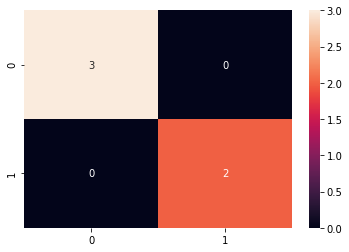

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()